# Regression with Scikit-Learn

In [1]:
import sklearn

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

## Our task

Dataset representing diabetes progression in a set of patients. Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline. Input features are already normalized.

Details here https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

In [4]:
from sklearn.datasets import load_diabetes

In [5]:
X, y = load_diabetes(return_X_y=True)

In [6]:
X.shape,  y.shape

((442, 10), (442,))

(array([38., 80., 68., 62., 50., 41., 38., 42., 17.,  6.]),
 array([ 25. ,  57.1,  89.2, 121.3, 153.4, 185.5, 217.6, 249.7, 281.8,
        313.9, 346. ]),
 <BarContainer object of 10 artists>)

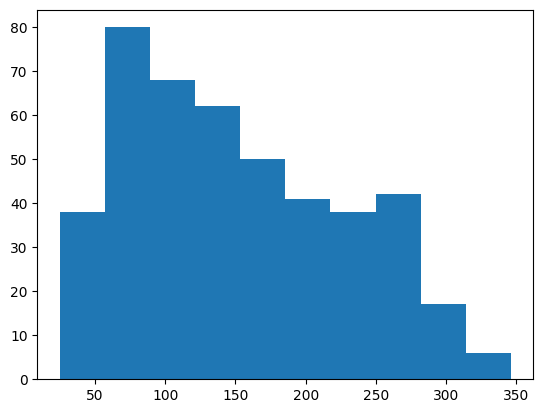

In [7]:
plt.hist(y)

### Construct selection and test sets

Now we create an arbitrarily split in order to have a selection set and a test set for the next experiments. Usually those splits are given by the task, e.g. ML Cup dataset for students and blind test set for the teacher.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=50, shuffle=True, random_state=42)

In [10]:
X_dev.shape, X_test.shape

((392, 10), (50, 10))

## Evaluation metrics

We'll now see some evaluation metrics for a regression, using a dummy baseline as an example

### A baseline predictor

An extremely naive baseline predictor returns always the *mean target value* as prediction:

In [11]:
np.mean(y_dev)

152.19642857142858

In [12]:
y_pred = np.ones_like(y_dev) * np.mean(y_dev)

In [13]:
y_test_pred = np.ones_like(y_test) * np.mean(y_dev)

### Evaluating the baseline

In [14]:
from sklearn.metrics import *

Mean absolute error (MAE): average of 1-norms of output errors.

$\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=1}^{n_{\text{samples}}} \left| y_i - \hat{y}_i \right|$.

In [15]:
mean_absolute_error(y_test, y_test_pred)

68.78357142857142

Mean squared error (MSE): average of squared 2-norms of output errors.

$\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=1}^{n_\text{samples}} (y_i - \hat{y}_i)^2$.

In [16]:
mean_squared_error(y_test, y_test_pred)

6138.900012755103

Root mean squared error (RMSE): square root of MSE.

$\text{RMSE}(y, \hat{y}) = \sqrt{\text{MSE}(y, \hat{y})}$

In [17]:
root_mean_squared_error(y_test, y_test_pred)

78.35113281092433

Other metrics are maxiumum error, median error, ...

Notice that in case of multi-output targets, these functions return the average errors among the targets.

Functions like *mean euclidean error* (MEE) must be implemented by the user, and then set as a custom scoring function in model evaluation.

In [18]:
def mean_eucliean_error(y_true, y_pred):
    errors = y_true - y_pred
    return np.linalg.norm(errors, axis=1).mean()

In [19]:
mean_eucliean_error(np.random.rand(10,2), np.random.rand(10,2))

0.4729165395547346

## Data transformations

Some models can benefit from target normalization, e.g. when training a multi-output neural network with target variables of different scales.

In [20]:
from sklearn.preprocessing import *

In [21]:
Y = np.concatenate((np.random.randn(100,1)*10+25, np.random.rand(100,1)), axis=1)

[]

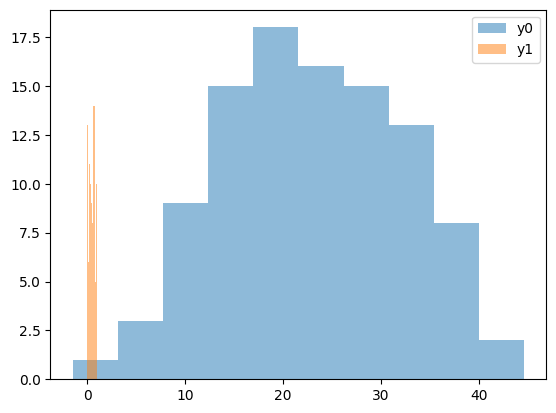

In [22]:
plt.hist(Y[:,0], alpha=.5, label='y0')
plt.hist(Y[:,1], alpha=.5, label='y1')
plt.legend(loc='upper right')
plt.plot()

- Rescale values between minimimum and maximum:

In [23]:
scaler = MinMaxScaler()

In [24]:
scaler.fit(Y)

MinMaxScaler()

In [25]:
Y_scaled = scaler.transform(Y)

[]

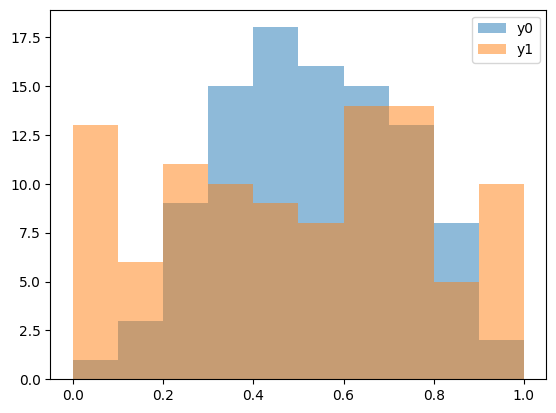

In [26]:
plt.hist(Y_scaled[:,0], alpha=.5, label='y0')
plt.hist(Y_scaled[:,1], alpha=.5, label='y1')
plt.legend(loc='upper right')
plt.plot()

- Normalize values with mean and standard deviation:

In [27]:
scaler = StandardScaler()

In [28]:
scaler.fit(Y)

StandardScaler()

In [29]:
Y_scaled = scaler.transform(Y)

[]

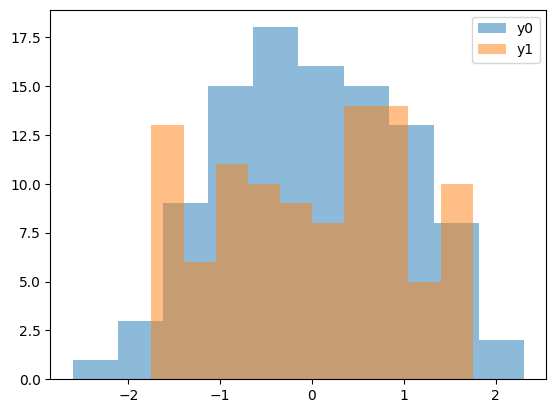

In [30]:
plt.hist(Y_scaled[:,0], alpha=.5, label='y0')
plt.hist(Y_scaled[:,1], alpha=.5, label='y1')
plt.legend(loc='upper right')
plt.plot()

- Remember to apply the inverse transform before estimating errors!

In [31]:
np.linalg.norm(scaler.inverse_transform(Y_scaled) - Y)

3.078742732723249e-15

## Nearest neighbour

k-NN returns the local interpolation of the targets of $k$ samples that are closest to $\mathbf{x}$.

In [32]:
from sklearn.neighbors import KNeighborsRegressor

In [33]:
model = KNeighborsRegressor(n_neighbors=3,  # number of neighbours
                           weights='uniform',  # or weight proportional to inverse of distance
                           metric='minkowski',  # or other user-define distances
                           p=2)  # p-norm for 'minkowski' metric

In [34]:
model.fit(X_dev, y_dev)

KNeighborsRegressor(n_neighbors=3)

In [35]:
mean_absolute_error(y_test, model.predict(X_test))

48.099999999999994

## Linear models

This class of models is essentially in the form $\hat{y} = \mathbf{w}^T \mathbf{x} + w_0$, with paramters $\mathbf{w}$ and $w_0$ to be trained. These models usually minimize the MSE with some form of weight regularization.

### Ridge regression

A linear model $\hat{y} = \mathbf{w}^T \mathbf{x} + w_0$ which is trained by least-squares regression $\min_{w} || X w - y||_2^2 + \alpha ||w||_2^2$, i.e. it is minimizing a penalized MSE.

In [36]:
from sklearn.linear_model import Ridge

In [37]:
model = Ridge(alpha=1.0,  # regularization parameter
              solver='auto')  # choose solving method (e.g. SVD, SGD, ...)

In [38]:
model.fit(X_dev, y_dev)

Ridge()

In [39]:
mean_absolute_error(y_test, model.predict(X_test))

47.1022668398695

### Other linear models

Other variants of linear models are distinguished by the type of regularization that is applied in error minimization:
- `Lasso`: Weights have L1 regularization to favor sparsity, 
- `ElasticNet`: Weights have both L1 and L2 regularization,
- ...

## Neural networks

A neural network regressor, where you can choose the hidden layers and their units, the training procedure (SGD, LBGFS, Adam), regularization, etc. The loss to be minimized is *MSE loss*.

The L2 regularization parameter is $\alpha$, larger ⇒ more regularization.

In [40]:
from sklearn.neural_network import MLPRegressor

In [41]:
nn = MLPRegressor(hidden_layer_sizes=(5,),  # input and output layer sizes automatically selected by fit()
                 activation='tanh',  # activation function
                 solver='sgd',  # {‘lbfgs’, ‘sgd’, ‘adam’}
                 alpha=1e-4,  # L2 regularization (is divied by #samples)
                 max_iter=50,  # epochs
                 batch_size=32,
                 shuffle=True,  # reshuffle samples between epochs
                 learning_rate='constant',  # can also be adaptive
                 learning_rate_init=1e-3,  # (initial) learning rate
                 momentum=0.9,
                 nesterovs_momentum=True,  # if you want to use Nesterov’s momentum, only for SGD
                 verbose=True)

In [42]:
nn.fit(X_dev, y_dev)

Iteration 1, loss = 12779.78061346
Iteration 2, loss = 6312.75951138
Iteration 3, loss = 3362.82173865
Iteration 4, loss = 2938.41876831
Iteration 5, loss = 2972.69178429
Iteration 6, loss = 2976.94935338
Iteration 7, loss = 2965.59833121
Iteration 8, loss = 2951.18581448
Iteration 9, loss = 2956.38528709
Iteration 10, loss = 2952.85587209
Iteration 11, loss = 2952.88589524
Iteration 12, loss = 2952.67728268
Iteration 13, loss = 2954.86175442
Iteration 14, loss = 2959.05880160
Iteration 15, loss = 2953.95234457
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPRegressor(activation='tanh', batch_size=32, hidden_layer_sizes=(5,),
             max_iter=50, solver='sgd', verbose=True)

You can access learning curve and other training statistics in the `MLPRegressor` object

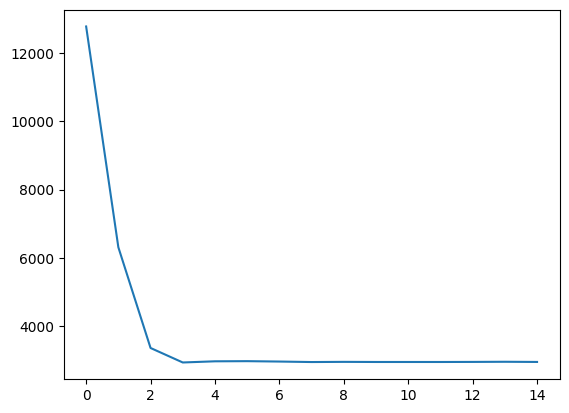

In [43]:
plt.plot(nn.loss_curve_)

In [44]:
mean_absolute_error(y_test, model.predict(X_test))

47.1022668398695

## Support vector machines

Support vector machines for regression $(C,\epsilon)$-SVR.

This class solves the soft-margin problem:
$\begin{align}\begin{aligned}\min_ {w, b, \zeta, \zeta^*} \frac{1}{2} w^T w + C \sum_{i=1}^{n} (\zeta_i + \zeta_i^*)\\\begin{split}\textrm {subject to } & y_i - (w^T \phi (x_i) + b) \leq \epsilon + \zeta_i,\\
& (w^T \phi (x_i) + b) - y_i \leq \epsilon + \zeta_i^*,\\
& \zeta_i, \zeta_i^* \geq 0, i=1, ..., n\end{split}\end{aligned}\end{align}$
where $C$ controls the strenght of regularization: larger $C$ ⇒ smaller regularization, and $\epsilon$ the tube diameter of the $\epsilon$-insensitive loss.

In the dual form, the kernel trick is applied in the scalar products $K(x_i, x_j) = \phi (x_i)^T \phi (x_j)$.

In [45]:
from sklearn.svm import SVR

In [46]:
svm = SVR(C=1.0,
          epsilon=0.1,
          kernel='linear',
          verbose=True)

For the linear SVR, the class `LinearSVR` can also be used, where the kernel trick is not applied.

In [47]:
svm.fit(X_dev, y_dev)

[LibSVM]*
optimization finished, #iter = 202
obj = -25180.916031, rho = -141.301770
nSV = 390, nBSV = 390


SVR(kernel='linear', verbose=True)

You can access statistics concerning the fit, such as number of support vectors per class:

In [48]:
svm.n_support_

array([390], dtype=int32)

In [49]:
mean_absolute_error(y_test, svm.predict(X_test))

66.50296286105457

## Exercise

Evaluate two or more of the following models: ridge regression, eleasticnet, k-NN, SVR with a double cross-validation, and report average test MAE with standard deviation.

5 folds of selection/test split; random seed = 42

Submit the results here: https://tinyurl.com/ml2024-regression

In [50]:
from sklearn.datasets import load_diabetes

In [51]:
X, y = load_diabetes(return_X_y=True)